In [2]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
tf.__version__

NameError: name 'tf' is not defined

In [4]:
import keras

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [4]:
keras.__version__

'2.2.4'

In [5]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

In [6]:
from keras.datasets import mnist

In [7]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)=mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [8]:
print('train data=',len(x_train_image))
print('test data=',len(x_test_image))

train data= 60000
test data= 10000


In [9]:
print('x_train_image:',x_train_image.shape)
print('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [10]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig=plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image,cmap='binary')
    plt.show()

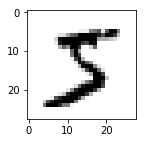

In [11]:
plot_image(x_train_image[0])

In [12]:
y_train_label[0]

5

In [18]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title="label="+str(labels[idx])
        if len(prediction)>0:
            title+=",prediction="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

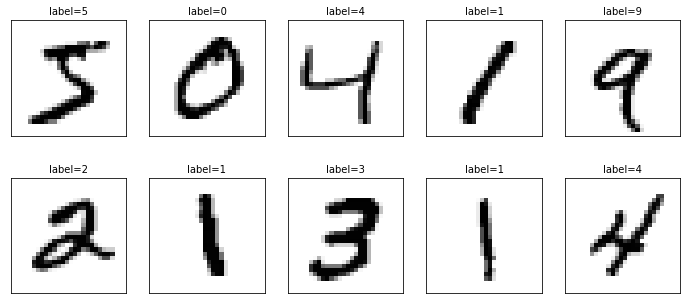

In [19]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)

In [20]:
print('x_test_image:',x_test_image.shape)
print('y_test_label',y_test_label.shape)

x_test_image: (10000, 28, 28)
y_test_label (10000,)


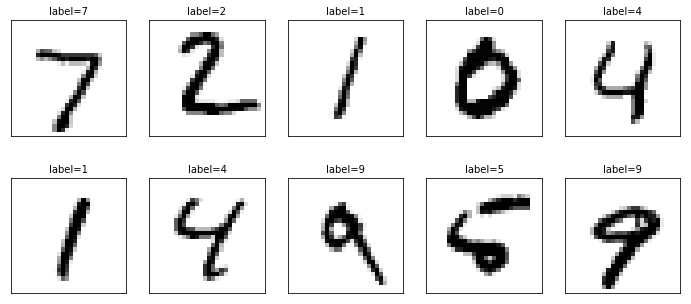

In [21]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

In [23]:
print('x_train_image:',x_train_image.shape)
print('y_train_label',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label (60000,)


In [24]:
x_Train=x_train_image.reshape(60000,784).astype('float32')
x_Test=x_test_image.reshape(10000,784).astype('float32')

In [25]:
x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255

In [26]:
y_TrainOneHot=np_utils.to_categorical(y_train_label)
y_TestOneHot=np_utils.to_categorical(y_test_label)

In [27]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## 建立多層感知器模型

In [28]:
from keras.models import Sequential
from keras.layers import Dense

In [29]:
model=Sequential()

W0706 09:31:03.947996 16808 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [30]:
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))

W0706 09:31:58.579874 16808 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 09:31:58.609796 16808 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [31]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [32]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

W0706 09:36:14.024550 16808 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0706 09:36:14.064444 16808 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [35]:
train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

W0706 09:38:16.152570 16808 deprecation.py:323] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0706 09:38:16.198448 16808 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4381 - acc: 0.8829 - val_loss: 0.2182 - val_acc: 0.9407
Epoch 2/10
 - 1s - loss: 0.1909 - acc: 0.9456 - val_loss: 0.1558 - val_acc: 0.9556
Epoch 3/10
 - 1s - loss: 0.1355 - acc: 0.9617 - val_loss: 0.1260 - val_acc: 0.9648
Epoch 4/10
 - 1s - loss: 0.1028 - acc: 0.9701 - val_loss: 0.1122 - val_acc: 0.9680
Epoch 5/10
 - 1s - loss: 0.0812 - acc: 0.9773 - val_loss: 0.0981 - val_acc: 0.9715
Epoch 6/10
 - 1s - loss: 0.0661 - acc: 0.9821 - val_loss: 0.0935 - val_acc: 0.9723
Epoch 7/10
 - 1s - loss: 0.0545 - acc: 0.9849 - val_loss: 0.0912 - val_acc: 0.9738
Epoch 8/10
 - 1s - loss: 0.0461 - acc: 0.9875 - val_loss: 0.0828 - val_acc: 0.9763
Epoch 9/10
 - 1s - loss: 0.0382 - acc: 0.9901 - val_loss: 0.0824 - val_acc: 0.9759
Epoch 10/10
 - 1s - loss: 0.0319 - acc: 0.9917 - val_loss: 0.0807 - val_acc: 0.9766


In [36]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

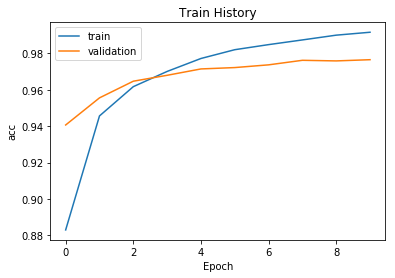

In [37]:
show_train_history(train_history,'acc','val_acc')

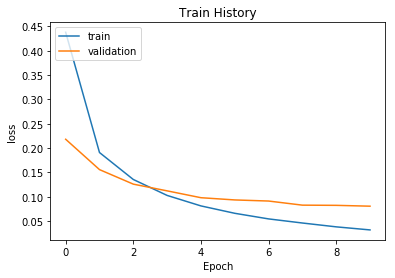

In [38]:
show_train_history(train_history,'loss','val_loss')

In [39]:
scores=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 23us/step

accuracy= 0.976


In [41]:
prediction=model.predict_classes(x_Test)

In [42]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

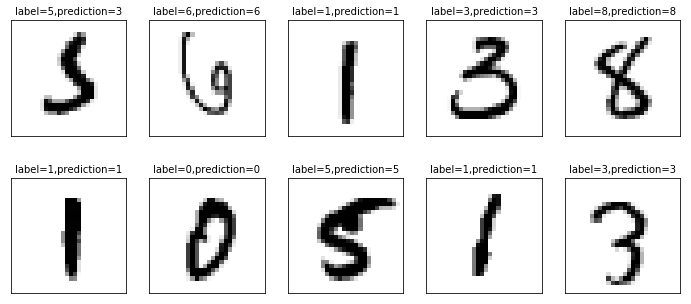

In [43]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [44]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1010,1,1,0,2,3,9,1
3,0,0,2,995,0,1,0,3,5,4
4,1,0,5,1,960,0,3,0,3,9
5,3,0,0,15,1,854,7,1,8,3
6,6,3,3,1,3,3,937,0,2,0
7,0,5,13,7,1,0,0,988,6,8
8,4,0,3,7,0,1,1,2,955,1


In [45]:
df=pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [46]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3
4355,5,3


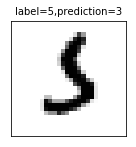

In [47]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)

## 加入DropOut避免overfitting

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [50]:
model=Sequential()

In [51]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

In [53]:
model.add(Dropout(0.5))

W0706 10:10:21.064993 16808 deprecation.py:506] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [54]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [55]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [57]:
train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

In [1]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NameError: name 'model' is not defined

## 有關損失函數

In [ ]:
from keras import losses
model.compile(loss='mean_squared_error',optimizer='sqd')
keras.losses.mean_squared_error(y_true,y_pred)

In [ ]:
from keras import losses
model.compile(loss='categorical_crossentropy',optimizer='sqd')
keras.losses.categorical_crossentropy(y_true,y_pred)

In [ ]:
from keras import losses
model.compile(loss='hinge',optimizer='sqd')
keras.losses.hinge(y_true,y_pred)

In [ ]:
from keras import losses
model.compile(loss='binary _crossentropy',optimizer='sqd')
keras.losses.binary _crossentropy(y_true,y_pred)

## 有關optimizer

In [ ]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd) 

In [ ]:
opt = optimizers. Adagrad(lr=0.01, epsilon=None, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=opt) 

In [ ]:
opt = optimizers.RMSprop(lr=0.001, epsilon=None, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=opt) 

In [ ]:
opt = optimizers. Adam(lr=0.001, epsilon=None, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=opt) 

## 加入驗證集

In [ ]:
train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2,shuffle=True)

In [ ]:
train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_data=(x_valid,y_valid),epochs=10,batch_size=200,verbose=2)

## 正規化

In [ ]:
keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1),kernel_regularizer=l2(l2_ratio))(x)

In [ ]:
keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1),kernel_regularizer=l1(l1_ratio))(x)

## Batch normalization

In [ ]:
from keras.layers import BatchNormalization
x = BatchNormalization()(x)

## Callbacks

In [ ]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_loss", 
                          patience=5, 
                          verbose=1
                          )

In [ ]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

In [ ]:
from keras.callbacks import EarlyStopping
_patience = [10,25]

results = {}
for p in _patience:
    earlystop = EarlyStopping(monitor="val_loss", 
                          patience=p, 
                          verbose=1
                          )
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag = "exp-l2-%s" % str(p)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

In [ ]:
from keras.callbacks import ModelCheckpoint

model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=True)

In [ ]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )

In [ ]:

## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
models = {'model1_best_on', 'model2_weight_on'}

In [ ]:

from keras.callbacks import ModelCheckpoint
from keras.models import load_model

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for name in models:
    if name == 'model1_best_on':
        model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", save_best_only=True)
        print("model1: best on")
    else:
        model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", save_weights_only=True)
        print("model2: weight on")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )
# Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

# Load back
    if name == 'model1_best_on':
        model = keras.models.load_model("./tmp.h5")
        loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    else:
        model.load_weights("./tmp.h5")
        loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
        
    record = "%s" %(name)
    results[record]= {
            'train_loss':train_loss,
            'valid_loss':valid_loss,
            'train_acc':train_acc,
            'valid_acc':valid_acc,
            'loss_loadback':loss_loadback,
            'acc_loadback':acc_loadback
    }
    

In [ ]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(factor=0.5, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=5, 
                              verbose=1)

In [ ]:
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.3,0.5,0.7]
redice_lr_patient = [3,4,5]

In [ ]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr =ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )
    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

In [ ]:

"""
# 載入 Callbacks，撰寫一個 f1 score 的 callback function
"""

from keras.callbacks import Callback
from sklearn.metrics import f1_score

class f1sc(Callback):
    def on_train_begin(self, epoch, logs = {}):
        logs = logs or {}
        record_items = ["val_auc", "val_f1sc", "val_fp", "val_fn", "val_tp", "val_tn"]
        for i in record_items:
            if i not in self.params['metrics']:
                self.params['metrics'].append(i)
    
    def on_epoch_end(self, epoch, logs = {}, thres=0.5):
        logs = logs or {}
        y_true = self.validation_data[1].argmax(axis = 1)
        y_pred = self.model.predict(self.validation_data[0])
        y_pred = (y_pred[:, 1] >= thres) * 1
        
        logs["val_f1sc"] = f1_score(y_true = y_true, y_pred = y_pred, average="weighted")
        
log_f1sc = f1sc()

In [ ]:
# 載入 Callbacks
from keras.callbacks import Callback
import numpy as np
# Record_fp_tp
class Record_tp_tn(Callback):
    """Code Here
    撰寫一個紀錄 ture positive 與 true negative 數量的 callbacks    
    """
    def on_train_begin(self, epoch, logs = {}):
        logs = logs or {}
        record_items = ["val_auc", "true_positives", "true_negatives", "val_fp", "val_fn", "val_tp", "val_tn"]
        for i in record_items:
            if i not in self.params['metrics']:
                self.params['metrics'].append(i)
    
    def on_epoch_end(self, epoch, logs = {}, thres=0.5):
        logs = logs or {}
        y_true = self.validation_data[1].argmax(axis = 1)
        y_pred = self.model.predict(self.validation_data[0])
        y_pred = (y_pred[:, 1] >= thres) * 1
        true_positives = np.sum(np.logical_and(y_pred == 1, y_true == 1)) #預測是1結果也是1
        true_negatives = np.sum(np.logical_and(y_pred == 0, y_true == 0))
        logs["true_positives"] = true_positives
        logs["true_negatives"] = true_negatives
        
        

rec_tptn = Record_tp_tn()

In [ ]:
valid_tp = model.history.history['true_positives']
valid_tn = model.history.history['true_negatives']

## 自行定義loss function

In [ ]:
import tensorflow as tf
import keras.backend as K

"""
# 撰寫自定義的 loss function: focal loss (https://blog.csdn.net/u014380165/article/details/77019084)
"""
def focal_loss(gamma=2., alpha=4.):
    gamma = float(gamma)
    alpha = float(alpha)
    def focal_loss_fixed(y_true, y_pred):
        """Focal loss for multi-classification
        FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
        """
        epsilon = 1e-8
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)

        model_out = tf.add(y_pred, epsilon)
        ce = tf.multiply(y_true, -tf.log(model_out))
        weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
        fl = tf.multiply(alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
        return tf.reduce_mean(reduced_fl)
    return focal_loss_fixed

In [ ]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
"""
# 在 compile 時，使用自定義的 loss function
"""
model.compile(loss=focal_loss(), metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

valid_f1sc = model.history.history['val_f1sc']

In [ ]:
import tensorflow as tf
import keras.backend as K

"""Code Here
撰寫一個 loss function, 使其可以結合 focal loss 與 crossentropy loss
"""
def combined_loss(gamma=2., alpha=4.):
    gamma = float(gamma)
    alpha = float(alpha)

    def focal_loss_fixed(y_true, y_pred):
        #"""Focal loss for multi-classification
      #  FL(p_t)=-alpha(1-p_t)^{gamma}log(p_t)
      #  CE(p_t)=-log(p_t)
       # """
        epsilon = 1e-8
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)

        model_out = tf.add(y_pred, epsilon) # p_t
        ce = tf.multiply(y_true, -tf.log(model_out))
            
        weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
        fl = tf.multiply(alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
            
        return 0.3*tf.reduce_mean(reduced_fl) + 0.7*(-tf.log(model_out))
    return focal_loss_fixed

        
    
ce_weights_list = [0., 0.3, 0.5, 0.7, 1]

In [ ]:
import itertools
results = {}

for i, ce_w in enumerate(ce_weights_list):
    print("Numbers of exp: %i, ce_weight: %.2f" % (i, ce_w))

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    """Code Here
    將自定義的 loss function 加入模型
    """
    model.compile(loss=combined_loss(), metrics=["accuracy"], optimizer=optimizer)


    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True
             )
    
    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}